## Observations and Insights 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")

# Display the data table for preview
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_merge_df['Mouse ID'].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = mouse_merge_df[mouse_merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_mouse_df = mouse_merge_df[mouse_merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first')]
clean_mouse_df = mouse_merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
clean_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mouse_df['Mouse ID'].unique())
mice_count

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_volume_mean_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem_reg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_reg_df = pd.DataFrame({'Tumor Volume Mean':tumor_volume_mean_reg, 
                                 'Tumor Volume Median':tumor_volume_median_reg,
                                 'Tumor Volume Variance':tumor_volume_variance_reg,
                                 'Tumor Volume Standard Dev':tumor_volume_std_reg,
                                 'Tumor Volume SEM':tumor_volume_sem_reg})
summary_stats_reg_df

# Using the aggregation method, produce the same summary statistics in a single line
# tumor_volume_mean = clean_mouse_df["Tumor Volume (mm3)"].mean()
# tumor_volume_median = clean_mouse_df["Tumor Volume (mm3)"].median()
# tumor_volume_variance = clean_mouse_df["Tumor Volume (mm3)"].var()
# tumor_volume_std = clean_mouse_df["Tumor Volume (mm3)"].std()
# tumor_volume_sem = clean_mouse_df["Tumor Volume (mm3)"].sem()

# summary_stats_df = pd.DataFrame(tumor_volume_mean, 
#                                  tumor_volume_median,
#                                  tumor_volume_variance,
#                                  tumor_volume_std,
#                                  tumor_volume_sem)
# summary_stats_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

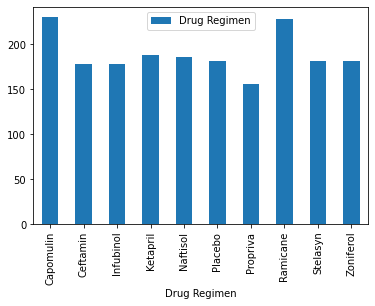

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measurements = clean_mouse_df.groupby("Drug Regimen")["Drug Regimen"].count()
drug_measurements_df = pd.DataFrame(drug_measurement_df)
drug_measurements_df.plot.bar()

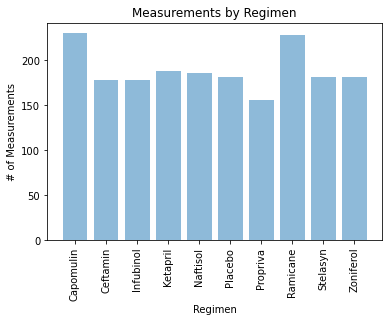

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril', 'Naftisol', 'Placebo', 'Propriva','Ramicane','Stelasyn','Zoniferol']
y_axis = [230,178,178,188,186,181,156,228,181,182]
plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.ylabel('# of Measurements')
plt.xlabel('Regimen')
plt.title('Measurements by Regimen')
plt.xticks(rotation='vertical')
plt.show()

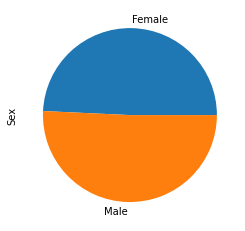

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_mouse_df.groupby("Sex")["Sex"].count()
gender_count.plot.pie()

([<matplotlib.patches.Wedge at 0x1c556bee340>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')])

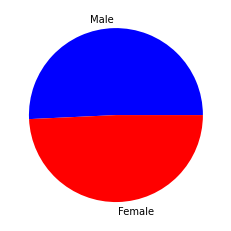

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
size = [958,930]
colors = ['b','r']

plt.pie(size, labels=labels, colors=colors)

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_group = clean_mouse_df.groupby("Mouse ID")["Timepoint"].max()
max_tp_group_df = pd.DataFrame(max_tp_group,lsuffix='str')
max_tp_group_df

new_df = max_tp_group_df.join(mouse_merge_df)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# new_df = pd.merge(mouse_merge_df, max_tp_group, on='Timepoint', how="outer")
# new_df

TypeError: __init__() got an unexpected keyword argument 'lsuffix'

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

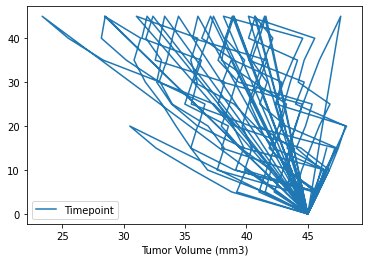

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
capomulin_slim_df = capomulin_df[['Timepoint', 'Tumor Volume (mm3)']]

capomulin_slim_df.plot.line(x='Tumor Volume (mm3)', y='Timepoint')

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
